# Bagging

### 1. Bootstrap
Bootstrap은 통계학과 머신러닝에서 데이터 샘플링을 통해 모델의 성능을 향상시키기 위한 기법입니다. 주로 작은 데이터셋을 기반으로 더 많은 데이터를 생성하거나 모델의 안정성을 높이기 위해 사용됩니다.

### 주요 개념
샘플링 방법: 원래 데이터셋에서 반복해서 임의의 샘플을 뽑는 방식입니다. 이때, 동일한 샘플이 여러 번 선택될 수 있습니다(복원 추출).
샘플 크기: 보통 원래 데이터셋의 크기와 동일하게 샘플링합니다. 예를 들어, 원래 데이터셋이 100개라면, 부트스트랩 샘플도 100개가 됩니다.

### Bootstrap의 장점
- 모델의 불확실성 추정: 다양한 샘플을 기반으로 모델을 학습하여 평균 성능과 불확실성을 추정할 수 있습니다.
- 모델의 안정성 향상: 샘플링된 여러 데이터셋에서 모델을 학습하여 개별 모델의 편향을 줄이고, 분산을 낮춥니다.

### 2. Bagging (Bootstrap Aggregating)
Bagging은 Bootstrap 기법을 이용하여 모델의 성능을 향상시키고, 편향을 줄이며 분산을 낮추는 앙상블 학습 방법입니다. 주로 결정 트리와 같은 고분산 모델에 많이 사용됩니다.

### 주요 개념
- Bootstrap 샘플 생성: 원본 데이터셋에서 여러 개의 Bootstrap 샘플을 생성합니다.
- 개별 모델 학습: 각 Bootstrap 샘플에서 독립적인 모델을 학습시킵니다.
- 결과 집계: 분류 문제에서는 다수결 투표(voting), 회귀 문제에서는 평균을 내어 최종 예측을 만듭니다.

### Bagging의 장점
- 과적합(Overfitting) 감소: 다수의 샘플에 대해 학습하기 때문에 특정 데이터에 대한 과적합을 줄일 수 있습니다.
- 모델의 성능 향상: 다양한 데이터로 훈련된 여러 모델의 예측을 통합함으로써 일반화 성능을 향상시킵니다.

scikit-learn 라이브러리의 BaggingRegressor를 사용하여, 부트스트랩 샘플을 통해 여러 개의 결정 트리 모델을 학습하고 이를 앙상블합니다.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import BaggingRegressor as BR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# step 1. 데이터 생성
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# step 2 단일 경정 트리 모델 학습
single_tree = DT(random_state=42)
single_tree.fit(X_train, y_train)
single_y_pred = single_tree.predict(X_test)

In [9]:
# step 3. Bagging을 이용한 결정 트리 앙상블 모델 학습
bagging_model = BR(
    estimator=DT(), 
    n_estimators=10,  # 10개의 부트스트램 샘플로 모델 생성
    random_state=42
)

In [10]:
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

In [11]:
bagging_y_pred = bagging_model.predict(X_test)

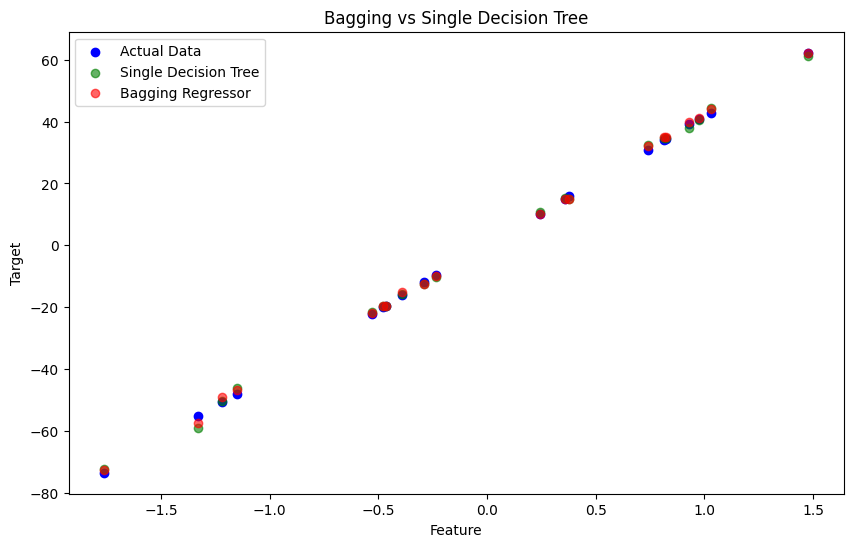

In [13]:
# step 4 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, single_y_pred, color='green', label='Single Decision Tree', alpha=0.6)
plt.scatter(X_test, bagging_y_pred, color='red', label='Bagging Regressor', alpha=0.6)
plt.title('Bagging vs Single Decision Tree')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# 공공 자전거 데이터의 이상치 확인

In [14]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('exam1_modify7.csv')

df.columns

Index(['year', 'month', 'hour', 'dayofweek', 'windforce', 'discomfort',
       'heat_stroke', 'wind_chill', 'regular', 'casual', 'group'],
      dtype='object')

In [18]:
features = ['year', 'month', 'hour', 'dayofweek', 'windforce', 'discomfort', 'heat_stroke', 'wind_chill']
label = 'regular'

In [21]:
from sklearn.tree import DecisionTreeRegressor as DT

# 시멘틱 sampling

train, test = df[0::2], df[1::2]   #  train =[0, 2, 4, 6, 8 ...], test=[1, 3, 5, 7, ....]   (start, stop, step]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [23]:
sampler = [1, 12000, 800, 678]
train.iloc[sampler]

,index,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,wind_chill,regular,casual,group
1,2,2021,1,2,4,0,0,0,0,193,53.0,0.0
12000,24000,2023,7,17,0,0,1,1,0,8425,1058.0,0.0
800,1600,2021,3,16,5,0,0,0,0,2680,1625.0,68.0
678,1356,2021,2,15,2,0,0,0,0,2128,856.0,16.0


In [25]:
sample_ls = []
for i in range(5):
    sample_ls.append(i)

sample_ls

[0, 1, 2, 3, 4]

In [27]:
sample_ls = [i for i in range(5)]    # 위에 있는 for문 단축하여 사용
sample_ls

[0, 1, 2, 3, 4]

In [30]:
from random import randint, seed

seed(42)
sample_ls = [randint(0, 5) for _ in range(5) ]   #  _ 는 버린다는 뜻.
sample_ls

[5, 0, 0, 5, 2]

In [31]:
train.tail()

,index,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,wind_chill,regular,casual,group
18945,37890,2024,12,14,1,0,0,0,0,3361,522.0,0.0
18946,37892,2024,12,16,1,0,0,0,0,4296,566.0,0.0
18947,37894,2024,12,18,1,0,0,0,0,4911,564.0,0.0
18948,37896,2024,12,20,1,0,0,0,0,2368,316.0,0.0
18949,37898,2024,12,22,1,0,0,0,0,1760,288.0,0.0


In [32]:
len(train)

18950

In [36]:
# List Comprehension - python에서 List를 효율적으로 사용하려면

sampler = [randint(0, len(train) -1 ) for _ in range(len(train)) ]
train.iloc[sampler]

,index,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,wind_chill,regular,casual,group
3972,7944,2021,11,20,6,0,0,0,0,3114,1280.0,35.0
17119,34238,2024,8,19,6,0,1,1,0,5103,1885.0,0.0
9151,18302,2022,12,6,5,0,0,0,0,417,27.0,0.0
11376,22752,2023,6,2,2,0,0,0,0,898,314.0,0.0
5897,11794,2022,4,14,1,0,0,0,0,3932,1192.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14159,28318,2024,1,3,1,0,0,0,0,298,92.0,0.0
16257,32514,2024,6,11,1,0,1,1,0,4824,762.0,0.0
2882,5764,2021,8,9,6,0,1,1,0,2077,537.0,16.0
6788,13576,2022,6,20,0,0,1,0,0,8442,2154.0,54.0


In [37]:
def bootstrap():
    sampler = [randint(0, len(train) -1 ) for _ in range(len(train)) ]
    return train.iloc[sampler]    

In [38]:
bootstrap()  # 복원 추출 - 18950 rows

,index,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,wind_chill,regular,casual,group
10031,20062,2023,2,16,5,0,0,0,0,3491,1132.0,60.0
13720,27440,2023,11,5,1,0,0,0,0,1167,48.0,0.0
6414,12828,2022,5,9,6,0,0,0,0,3241,850.0,43.0
10770,21540,2023,4,21,5,0,0,0,0,4937,2333.0,0.0
2735,5470,2021,8,13,2,0,2,2,0,2764,488.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
453,906,2021,2,23,5,0,0,0,0,577,244.0,6.0
5747,11494,2022,3,21,3,0,0,0,0,3737,908.0,27.0
14993,29986,2024,3,0,4,0,0,0,0,1421,296.0,0.0
4577,9154,2021,12,5,0,0,0,0,1,300,16.0,0.0


In [40]:
multi_df = [bootstrap() for _ in range(100)]
len(multi_df)

100

In [41]:
multi_df[0]

,index,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,wind_chill,regular,casual,group
6463,12926,2022,5,13,3,0,0,1,0,4683,1059.0,23.0
10848,21696,2023,4,0,5,0,0,0,0,443,104.0,0.0
5372,10744,2022,3,16,2,0,0,0,0,3220,816.0,11.0
11937,23874,2023,7,23,4,0,1,0,0,1201,133.0,0.0
2353,4706,2021,7,13,1,0,0,0,0,3201,597.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7676,15352,2022,8,13,0,0,1,1,0,4032,772.0,14.0
8749,17498,2022,11,9,0,0,0,0,0,5462,512.0,2.0
14558,29116,2024,2,0,5,0,0,0,0,1583,397.0,0.0
10867,21734,2023,4,8,6,0,0,0,0,2500,445.0,0.0


In [42]:
multi_df[99]

,index,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,wind_chill,regular,casual,group
15512,31024,2024,4,12,1,0,0,0,0,4362,618.0,0.0
17873,35746,2024,10,14,0,0,0,0,0,4951,1127.0,0.0
10794,21588,2023,4,20,0,0,0,0,0,7277,1503.0,0.0
8663,17326,2022,11,15,0,0,0,0,0,5131,1021.0,14.0
8521,17042,2022,10,16,2,0,0,0,0,7112,1535.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2460,4920,2021,7,17,1,0,2,2,0,6342,981.0,9.0
10628,21256,2023,4,21,2,0,0,0,0,5231,854.0,0.0
7298,14596,2022,7,13,0,0,2,2,0,4228,792.0,19.0
8682,17364,2022,11,5,2,0,0,0,0,1171,94.0,0.0


In [44]:
from sklearn.tree import DecisionTreeRegressor as DT
forest = []
for single in multi_df:
    X_single, y_single = single[features], single[label]
    tree = DT()
    tree.fit(X_single, y_single)
    forest.append(tree)

len(forest)

100

In [45]:
forest[0].predict(X_test)

array([ 267.,  238.,  349., ..., 6229., 4545., 1308.])

In [46]:
forest[10].predict(X_test)

array([ 368.6       ,  152.        ,  227.5       , ..., 6139.        ,
       4746.33333333, 1641.        ])

In [48]:
opinions = pd.DataFrame()
n = 1
for single_tree in forest:
    opinions[str(n) + 'th_tree_say'] = single_tree.predict(X_test)
    n = n + 1

opinions.head()

,1th_tree_say,2th_tree_say,3th_tree_say,4th_tree_say,5th_tree_say,6th_tree_say,7th_tree_say,8th_tree_say,9th_tree_say,10th_tree_say,11th_tree_say,12th_tree_say,13th_tree_say,14th_tree_say,15th_tree_say,16th_tree_say,17th_tree_say,18th_tree_say,19th_tree_say,20th_tree_say,21th_tree_say,22th_tree_say,23th_tree_say,24th_tree_say,25th_tree_say,26th_tree_say,27th_tree_say,28th_tree_say,29th_tree_say,30th_tree_say,31th_tree_say,32th_tree_say,33th_tree_say,34th_tree_say,35th_tree_say,36th_tree_say,37th_tree_say,38th_tree_say,39th_tree_say,40th_tree_say,...,61th_tree_say,62th_tree_say,63th_tree_say,64th_tree_say,65th_tree_say,66th_tree_say,67th_tree_say,68th_tree_say,69th_tree_say,70th_tree_say,71th_tree_say,72th_tree_say,73th_tree_say,74th_tree_say,75th_tree_say,76th_tree_say,77th_tree_say,78th_tree_say,79th_tree_say,80th_tree_say,81th_tree_say,82th_tree_say,83th_tree_say,84th_tree_say,85th_tree_say,86th_tree_say,87th_tree_say,88th_tree_say,89th_tree_say,90th_tree_say,91th_tree_say,92th_tree_say,93th_tree_say,94th_tree_say,95th_tree_say,96th_tree_say,97th_tree_say,98th_tree_say,99th_tree_say,100th_tree_say
0,267.0,404.5,251.0,373.0,251.000000,251.0,251.0,371.0,371.0,251.0,368.6,225.0,251.0,251.0,371.0,251.0,251.0,436.000000,251.0,225.0,251.000000,251.000000,251.0,371.000000,373.0,251.000000,371.0,251.0,338.0,394.0,251.0,251.0,251.0,251.0,251.000000,251.0,251.0,251.0,371.0,251.0,...,404.5,251.000000,251.0,251.0,371.0,251.000000,251.0,251.0,251.0,251.0,542.0,373.0,207.000000,251.0,371.0,371.0,251.0,436.000000,251.0,251.00,251.000000,225.0,251.0,251.0,373.000000,330.666667,251.0,251.0,378.0,251.0,251.00,251.0,251.0,251.0,251.0,420.250000,251.0,415.0,251.000000,225.000000
1,238.0,237.0,97.0,50.0,152.000000,215.0,152.0,113.0,152.0,152.0,152.0,152.0,152.0,186.0,152.0,195.0,195.0,152.000000,152.0,152.0,222.333333,152.000000,152.0,142.090909,152.0,168.000000,152.0,152.0,144.0,152.0,152.0,152.0,152.0,152.0,95.333333,152.0,152.0,186.0,215.0,152.0,...,152.0,152.000000,129.0,152.0,152.0,152.000000,152.0,152.0,152.0,138.5,50.0,113.0,152.000000,132.5,152.0,152.0,152.0,152.000000,216.5,152.00,152.000000,152.0,152.0,152.0,167.500000,152.000000,152.0,152.0,152.0,152.0,152.00,152.0,152.0,152.0,152.0,223.666667,152.0,162.0,152.000000,152.000000
2,349.0,315.0,349.0,323.0,173.000000,315.0,315.0,164.0,222.0,184.0,227.5,315.0,173.0,320.0,315.0,315.0,134.0,146.500000,173.0,164.0,315.000000,315.000000,191.0,315.000000,320.0,184.000000,315.0,315.0,349.0,173.0,315.0,173.0,315.0,291.0,315.000000,222.0,173.0,293.0,196.6,173.0,...,49.0,315.000000,315.0,315.0,315.0,173.000000,275.0,137.4,315.0,315.0,173.0,349.0,167.333333,315.0,158.5,184.0,315.0,315.000000,173.0,315.00,315.000000,315.0,315.0,173.0,299.285714,103.600000,315.0,315.0,251.8,134.0,151.00,256.5,95.0,159.0,315.0,315.000000,320.0,315.0,315.000000,315.000000
3,714.0,1612.0,421.0,896.0,442.500000,1612.0,1391.5,896.0,345.0,345.0,1612.0,1624.5,345.0,1400.0,1612.0,1612.0,1612.0,1612.000000,1390.4,1612.0,1459.333333,2115.142857,1323.5,1612.000000,1188.0,998.666667,1612.0,1612.0,866.0,1612.0,1612.0,349.0,1612.0,1163.5,2191.333333,1612.0,349.0,1612.0,1612.0,349.0,...,1612.0,1323.666667,1612.0,674.8,1595.0,1612.000000,349.0,1432.2,1612.0,1163.5,892.0,1612.0,756.250000,1612.0,1595.0,896.0,1323.5,1488.333333,349.0,1289.75,1541.666667,2138.0,1612.0,349.0,896.000000,388.333333,1844.2,1612.0,1390.4,1612.0,1289.75,475.0,1978.0,1612.0,1065.5,1188.000000,1536.5,1612.0,1648.333333,1541.666667
4,961.0,1595.0,1181.0,1217.0,944.333333,1181.0,1181.0,1181.0,1181.0,892.0,1181.0,1217.0,880.5,1181.0,1181.0,1072.0,1217.0,1389.333333,1181.0,1181.0,1217.000000,1181.000000,1181.0,1217.000000,1181.0,1181.000000,1217.0,1181.0,1181.0,929.5,1181.0,1181.0,1181.0,1181.0,1217.000000,1181.0,1181.0,1217.0,1323.0,1181.0,...,1181.0,1217.000000,1181.0,674.8,1217.0,1389.333333,1181.0,1181.0,1293.0,1181.0,1181.0,1181.0,1217.000000,1181.0,1181.0,1181.0,1181.0,1217.000000,1181.0,1181.00,1217.000000,1181.0,1217.0,1181.0,1181.000000,1181.000000,1217.0,

In [49]:
opinions.T.mean()

0         287.465167
1         156.564742
2         245.106857
3        1264.030595
4        1167.750667
            ...     
18945    3737.508032
18946    6803.888775
18947    5636.857316
18948    3412.379385
18949    1778.175095
Length: 18950, dtype: float64

In [50]:
y_test

0         249
1         153
2         118
3         362
4         429
         ... 
18945    3858
18946    4805
18947    3062
18948    2035
18949    1255
Name: regular, Length: 18950, dtype: int64

## MCOD(Monte Carlo Outlier Detection)
- 몬테카를로 방식의 이상치 탐지법  = 오차(틀린값)를 이용한 이상치 탐지법
- ref: (2009) A new Strategy of Outlier Detection for QSAR/QSPR

MCOD(Monte Carlo Outlier Detection)은 데이터 스트림 환경에서 이상치를 탐지하기 위한 $ 거리 기반 이상치 탐지 알고리즘$ 입니다. 이 알고리즘은 새로운 데이터가 지속적으로 유입되는 상황에서 실시간으로 이상치를 탐지하는 데 효율적입니다. 특히 MCOD는 거리 계산을 통해 이웃이 적은 데이터를 이상치로 간주하며, 다음과 같은 단계를 포함합니다.

### MCOD 알고리즘의 주요 개념 및 절차
1. 윈도우 기반 처리: MCOD는 슬라이딩 윈도우 방식을 사용하여 최신 데이터 포인트에 집중합니다. 슬라이딩 윈도우란 정해진 크기의 데이터만 유지하고, 새로운 데이터가 들어오면 오래된 데이터를 제거하여 최신 데이터만 분석하는 방식입니다.

2. 샘플링을 통한 거리 계산: 데이터의 모든 점에 대해 거리 기반 계산을 수행하면 시간이 많이 걸리므로 MCOD(몬테카를로)는 시뮬레이션을 통해 일부 점만 선택하여 거리 계산을 최적화합니다.

3. k-최근접 이웃(k-NN): 각 데이터 포인트는 k개의 가까운 이웃을 기준으로 이상치인지 여부를 판별합니다. k개의 이웃이 임계 거리 내에 있는지 확인하여, 이웃이 적거나 거리가 멀면 이상치로 간주합니다.

4. 임계 거리 설정: 특정 거리 임계값을 초과하는 점들은 주변에 이웃이 부족하다고 판단하고, 이를 이상치로 분류합니다.

5. 동적 업데이트: 데이터 스트림 환경에서 새로운 데이터가 계속 유입되기 때문에 모델이 데이터의 변화를 반영하도록 지속적으로 업데이트합니다.

MCOD 알고리즘을 구현하여, 2차원 랜덤 데이터를 생성하고 이상치를 탐지해보겠습니다.

In [52]:
import numpy as np
from random import random, seed
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix 

In [54]:
# step 1. 데이터 생성
seed(42)
normal_data = np.random.normal(0, 1, (100, 2))    # 평균 0, 표준편차가 1인 정규분포 데이터
outliers = np.random.uniform(low=-6, high=6, size=(5, 2))   # 범위가 -6 ~ 6 사이의 이상치 데이터
data = np.vstack([normal_data, outliers])      # 정성치 데이터와 이상치 데이터를 합침

In [73]:
# step 2. MCOD 파라미터 설정
k = 5     # k최근점 이웃의 수를 5로 설정
distance_threshold = 1.2   # 거리의 임계값을 1.5 설

In [74]:
# step 3 : 거리 행렬 게산
dist_matrix = distance_matrix(data, data)

In [75]:
# step 4: 이상치 탐지 함수 정의
def detect_outlier(data, dist_matrix, k, threshold):
    outliers = []
    for i in range(len(data)):
        # 각점에서 k개의 가장 가까운 거리 계산
        distances = np.sort(dist_matrix[i])[1:k+1]
        # 최대 거리가 임계값을 넘으면 이상치로 간주
        if np.max(distances) > threshold:
            outliers.append(i)
    return outliers

In [76]:
# step 5 : 이상치 탐지 실행
outlier_indices = detect_outlier(data, dist_matrix, k, distance_threshold)
outlier_indices

[3, 36, 41, 59, 100, 101, 102, 104]

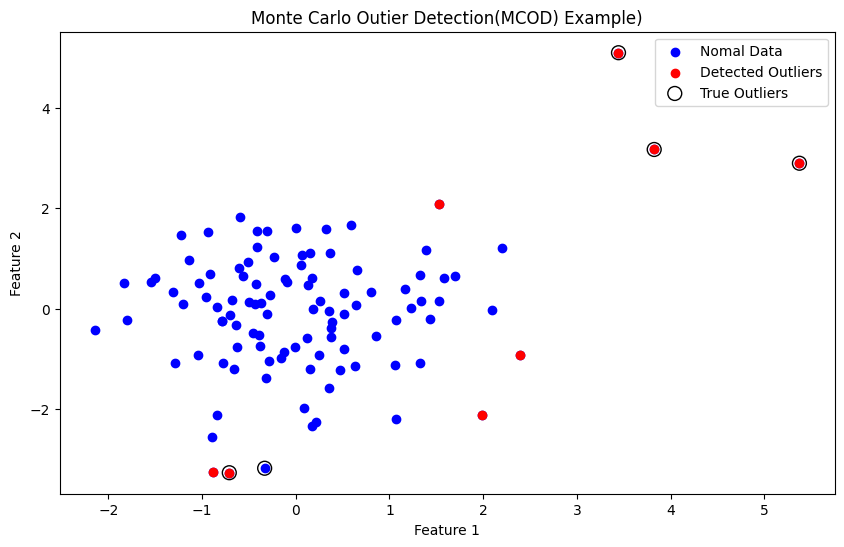

In [77]:
# step 6: 결과를 시각화
plt.figure(figsize=(10,6))
plt.scatter(data[:, 0], data[:, 1], label='Nomal Data', color='blue')     # 정상 데이터
plt.scatter(data[outlier_indices, 0], data[outlier_indices, 1], label='Detected Outliers', color='red')   # 탐지된 이상치
plt.scatter(outliers[:, 0], outliers[:, 1], label='True Outliers', edgecolor='black', facecolor='none', s=100, marker='o')   # 실제 이상치
plt.legend()
plt.title('Monte Carlo Outier Detection(MCOD) Example)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- 데이터 생성: 정상 데이터와 이상치 데이터를 각각 생성합니다. 정상 데이터는 평균이 0이고 표준편차가 1인 정규분포에서, 이상치는 -6에서 6 사이의 균등 분포에서 무작위로 생성합니다.
- 거리 계산: scipy.spatial.distance_matrix를 사용해 모든 데이터 포인트 간 거리를 계산합니다.
- 이상치 탐지 함수: 각 데이터 포인트의 k개의 가까운 이웃 중 가장 먼 이웃의 거리가 임계값보다 크면 해당 데이터를 이상치로 간주합니다.
- 결과 시각화: 정상 데이터(파란색), 탐지된 이상치(빨간색), 실제 이상치(검정 테두리의 원)를 표시합니다.

위 코드에서는 MCOD를 사용하여 정상 데이터와 이상치를 구분할 수 있습니다. 시각화된 결과에서 MCOD가 탐지한 이상치는 빨간색으로 표시되며, 실제 이상치와 비교해 성능을 평가할 수 있습니다

In [78]:
error_forest = pd.DataFrame()

n = 1

for single_tree in forest:
    error = (y_test - single_tree.predict(X_test)) ** 2  # 오차 정보를 더 크게 하기 위해서
    error_forest[str(n) + 'th_tree_error'] = error
    n = n + 1

error_forest.head()

,1th_tree_error,2th_tree_error,3th_tree_error,4th_tree_error,5th_tree_error,6th_tree_error,7th_tree_error,8th_tree_error,9th_tree_error,10th_tree_error,11th_tree_error,12th_tree_error,13th_tree_error,14th_tree_error,15th_tree_error,16th_tree_error,17th_tree_error,18th_tree_error,19th_tree_error,20th_tree_error,21th_tree_error,22th_tree_error,23th_tree_error,24th_tree_error,25th_tree_error,26th_tree_error,27th_tree_error,28th_tree_error,29th_tree_error,30th_tree_error,31th_tree_error,32th_tree_error,33th_tree_error,34th_tree_error,35th_tree_error,36th_tree_error,37th_tree_error,38th_tree_error,39th_tree_error,40th_tree_error,...,61th_tree_error,62th_tree_error,63th_tree_error,64th_tree_error,65th_tree_error,66th_tree_error,67th_tree_error,68th_tree_error,69th_tree_error,70th_tree_error,71th_tree_error,72th_tree_error,73th_tree_error,74th_tree_error,75th_tree_error,76th_tree_error,77th_tree_error,78th_tree_error,79th_tree_error,80th_tree_error,81th_tree_error,82th_tree_error,83th_tree_error,84th_tree_error,85th_tree_error,86th_tree_error,87th_tree_error,88th_tree_error,89th_tree_error,90th_tree_error,91th_tree_error,92th_tree_error,93th_tree_error,94th_tree_error,95th_tree_error,96th_tree_error,97th_tree_error,98th_tree_error,99th_tree_error,100th_tree_error
0,324.0,24180.25,4.0,15376.0,4.000000,4.0,4.00,14884.0,14884.0,4.0,14304.16,576.00,4.00,4.0,14884.0,4.0,4.0,3.496900e+04,4.00,576.0,4.000000e+00,4.000000e+00,4.00,1.488400e+04,15376.0,4.000000,14884.0,4.0,7921.0,21025.00,4.0,4.0,4.0,4.00,4.000000e+00,4.0,4.0,4.0,14884.00,4.0,...,24180.25,4.000000,4.0,4.00,14884.0,4.000000e+00,4.0,4.00,4.0,4.00,85849.0,15376.0,1764.000000,4.00,14884.00,14884.0,4.00,3.496900e+04,4.00,4.0000,4.000000e+00,576.0,4.0,4.0,15376.000000,6669.444444,4.00,4.0,16641.00,4.0,4.0000,4.00,4.0,4.0,4.00,29326.562500,4.00,27556.0,4.000000e+00,5.760000e+02
1,7225.0,7056.00,3136.0,10609.0,1.000000,3844.0,1.00,1600.0,1.0,1.0,1.00,1.00,1.00,1089.0,1.0,1764.0,1764.0,1.000000e+00,1.00,1.0,4.807111e+03,1.000000e+00,1.00,1.190083e+02,1.0,225.000000,1.0,1.0,81.0,1.00,1.0,1.0,1.0,1.00,3.325444e+03,1.0,1.0,1089.0,3844.00,1.0,...,1.00,1.000000,576.0,1.00,1.0,1.000000e+00,1.0,1.00,1.0,210.25,10609.0,1600.0,1.000000,420.25,1.00,1.0,1.00,1.000000e+00,4032.25,1.0000,1.000000e+00,1.0,1.0,1.0,210.250000,1.000000,1.00,1.0,1.00,1.0,1.0000,1.00,1.0,1.0,1.00,4993.777778,1.00,81.0,1.000000e+00,1.000000e+00
2,53361.0,38809.00,53361.0,42025.0,3025.000000,38809.0,38809.00,2116.0,10816.0,4356.0,11990.25,38809.00,3025.00,40804.0,38809.0,38809.0,256.0,8.122500e+02,3025.00,2116.0,3.880900e+04,3.880900e+04,5329.00,3.880900e+04,40804.0,4356.000000,38809.0,38809.0,53361.0,3025.00,38809.0,3025.0,38809.0,29929.00,3.880900e+04,10816.0,3025.0,30625.0,6177.96,3025.0,...,4761.00,38809.000000,38809.0,38809.00,38809.0,3.025000e+03,24649.0,376.36,38809.0,38809.00,3025.0,53361.0,2433.777778,38809.00,1640.25,4356.0,38809.00,3.880900e+04,3025.00,38809.0000,3.880900e+04,38809.0,38809.0,3025.0,32864.510204,207.360000,38809.00,38809.0,17902.44,256.0,1089.0000,19182.25,529.0,1681.0,38809.00,38809.000000,40804.00,38809.0,3.880900e+04,3.880900e+04
3,123904.0,1562500.00,3481.0,285156.0,6480.250000,1562500.0,1059870.25,285156.0,289.0,289.0,1562500.00,1593906.25,289.00,1077444.0,1562500.0,1562500.0,1562500.0,1.562500e+06,1057606.56,1562500.0,1.204140e+06,3.073510e+06,924482.25,1.562500e+06,682276.0,405344.444444,1562500.0,1562500.0,254016.0,1562500.00,1562500.0,169.0,1562500.0,642402.25,3.346460e+06,1562500.0,169.0,1562500.0,1562500.00,169.0,...,1562500.00,924802.777778,1562500.0,97843.84,1520289.0,1.562500e+06,169.0,1145328.04,1562500.0,642402.25,280900.0,1562500.0,155433.062500,1562500.00,1520289.00,285156.0,924482.25,1.268627e+06,169.00,860720.0625,1.391613e+06,3154176.0,1562500.0,169.0,285156.000000,693.444444,2196916.84,1562500.0,1057606.56,1562500.0,860720.0625,12769.00,2611456.0,1562500.0,494912.25,682276.000000,1379450.25,1562500.0,1.654653e+06,1.391613e+06
4,283024.0,1359556.00,565504.0,620944.0,265568.4

In [79]:
error_forest.T.mean()  

0        5.723637e+03
1        8.914749e+02
2        2.224706e+04
3        1.069111e+06
4        5.611888e+05
             ...     
18945    4.098400e+05
18946    5.036870e+06
18947    9.113316e+06
18948    2.790685e+06
18949    6.364785e+05
Length: 18950, dtype: float64

<img src="qsar-qspr.png">

이 이미지는 QSAR/QSPR 데이터 셋에서 이상치(outlier)와 정상 샘플을 구분하는 도식적인 다이어그램입니다. 다이어그램은 평균(mean)과 표준 편차(standard deviation, STD)를 기준으로 네 가지 다른 유형의 샘플을 설명합니다.

네 가지 구역은 다음과 같습니다:

 * X outliers (왼쪽 위 구역):
   * 표준 편차(STD)가 높은 샘플들이며, X 방향(설명 변수)에서 이상치를 나타냅니다. 즉, 예측 변수 측면에서 다른 샘플들과 차이가 나는 경우입니다.
   * features 값이 이상하다.


 * Abnormal samples or outliers both in X and y direction (오른쪽 위 구역):
   * X와 Y 방향(설명 변수와 종속 변수 모두)에서 모두 이상치로 분류되는 샘플들입니다. 즉, 예측 변수와 출력 값 모두에서 일반적인 패턴과 맞지 않는 샘플들을 의미합니다.


 * Normal samples (왼쪽 아래 구역):
   * 표준 편차와 평균이 모두 일반적인 범위에 있는 정상적인 샘플들입니다. 이들은 데이터의 주요 패턴을 따르는 샘플들입니다.
   * 오차가 적다. 데이터과 일관성이 있다.


 * y outliers or model outliers (오른쪽 아래 구역):
   * Y 방향(종속 변수, 예측된 값)에서 이상치를 나타내는 샘플들입니다. 예측된 값과 실제 값이 크게 차이가 나서 모델의 예측과 맞지 않는 샘플들입니다.
   * Y의 정답값이 이상하다.


이 도식은 QSAR/QSPR 데이터에서 X(입력 변수)와 Y(출력 변수) 간의 관계에서 이상치들을 식별하고, 그들이 주어진 데이터 내에서 어느 영역에 속하는지를 보여줍니다. 이와 같은 분석은 데이터 품질을 확인하고, 모델링 과정에서 적절한 조치를 취하는 데 중요합니다.

In [81]:
MCOD = pd.DataFrame()
MCOD['MEAN'] = error_forest.T.mean()
MCOD['STD'] = error_forest.T.std()
MCOD[features] = test[features]
MCOD.head()

,MEAN,STD,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,wind_chill
0,5.723637e+03,11878.126292,2021,1,1,4,0,0,0,0
1,8.914749e+02,2047.687585,2021,1,3,4,0,0,0,0
2,2.224706e+04,18270.427908,2021,1,5,4,0,0,0,0
3,1.069111e+06,784907.570308,2021,1,7,4,0,0,0,0
4,5.611888e+05,160373.838818,2021,1,9,4,0,0,0,0


<Axes: xlabel='MEAN', ylabel='STD'>

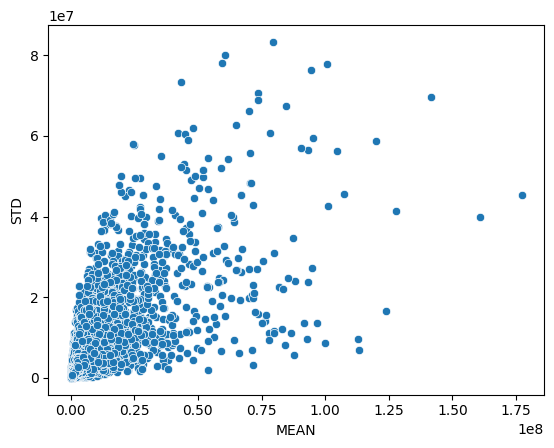

In [82]:
import seaborn as sns

sns.scatterplot(data=MCOD, x='MEAN', y='STD')

# 생소한 데이터 이해 및 처리
- prognostics 도메인

In [84]:
import pandas as pd

In [86]:
df = pd.read_csv('df_train.csv')
df.shape

(20631, 26)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine     20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   op_1       20631 non-null  float64
 3   op_2       20631 non-null  float64
 4   op_3       20631 non-null  int64  
 5   T2         20631 non-null  float64
 6   T24        20631 non-null  float64
 7   T30        20631 non-null  float64
 8   T50        20631 non-null  float64
 9   P2         20631 non-null  float64
 10  P15        20631 non-null  float64
 11  P30        20631 non-null  float64
 12  Nf         20631 non-null  float64
 13  Nc         20631 non-null  float64
 14  epr        20631 non-null  float64
 15  Ps30       20631 non-null  float64
 16  phi        20631 non-null  float64
 17  NRf        20631 non-null  float64
 18  NRc        20631 non-null  float64
 19  BPR        20631 non-null  float64
 20  farB  

In [88]:
df

,engine,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594
20628,100,198,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333
20629,100,199,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640


# Business Understanding
- 2 차산업군  - smart factory
- VM, APC, PHM -> 공공지능 활용 =>  운영 또는 정비 효율화

## 산업군 
- 1차 산업 : 농업, 축산업, 수산업 ....
- 2차 사업 : 광업, 제조업,가스 , .... 가공산업(공산품)
- 3차 산업 : 금융업, 보험업, 도소매업 : 서비스 관련 업종  

## VM(Virtual Metrology, 가상 계측), Soft_sensor
- 계측 시간을  줄임으로써 생산성 향상

## APC(Automatic Process Control, 자동 공정 관리)
- 불량율 줄임으로써 생산성 향상

## PHM(Prognostics and Health Management, 설비 예방 보전)
- Diagnostics

### 설비 고장시 해결절차(프로세스)
1. 현장 엔지니어가 설비 고장을 인지
2. 설비 담당 엔진니어 호출 ( 대부분 : 협력업체 , 설비 공급업체)
3. 설비 담당 엔지어가 출동
4. Diagnostics
5. TrubleShooting -> 고장 나서 -> 부품 교체
   - 국내에 재고가 있는 경우 -> 부품을 공급받아서 수리
   - 국내에 재고가 없는 경우 -> 해외에 부품 공급 의뢰 -> 수입통관 -> 수리 (수리 부품에 대한 적정 재고를 보유)

# EDA(탐색적 데이터 분석)
- 분석 방향성 : 설비를 가동하기 위한 예방 및 보전 활동
- 고장이라는 정보가 없음

In [91]:
df.columns

Index(['engine', 'cycle', 'op_1', 'op_2', 'op_3', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')

In [92]:
print(set(df['engine']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}


In [106]:
one_engine = df.loc[df['engine'] == 1].copy()
one_engine 

,engine,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100,518.67,643.75,1602.38,1422.78,14.62,21.61,551.94,2388.31,9037.91,1.3,48.00,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100,38.51,22.9588
188,1,189,-0.0006,0.0002,100,518.67,644.18,1596.17,1428.01,14.62,21.61,550.70,2388.27,9044.55,1.3,48.08,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100,38.48,23.1127
189,1,190,-0.0027,0.0001,100,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100,38.49,23.0675
190,1,191,0.0000,-0.0004,100,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100,38.45,23.1295


<Axes: xlabel='cycle', ylabel='T2'>

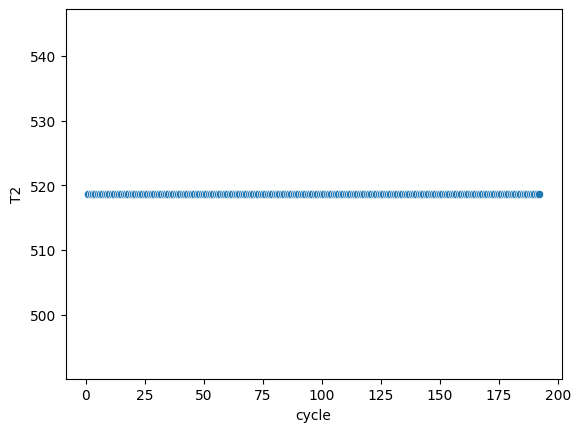

In [107]:
import seaborn as sns

sns.scatterplot(data=one_engine, x='cycle', y='T2')

<Axes: xlabel='cycle', ylabel='T24'>

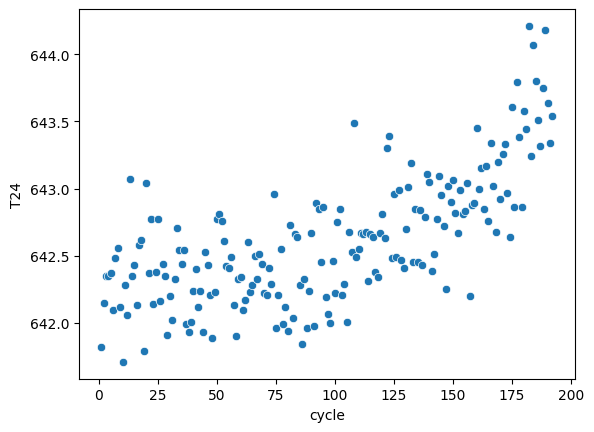

In [108]:
sns.scatterplot(data=one_engine, x='cycle', y='T24')

<Axes: xlabel='cycle', ylabel='T24'>

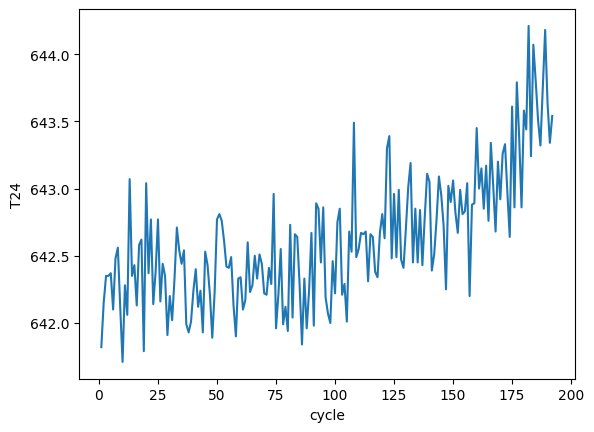

In [109]:
sns.lineplot(data=one_engine, x='cycle', y='T24')

<Axes: xlabel='cycle', ylabel='P30'>

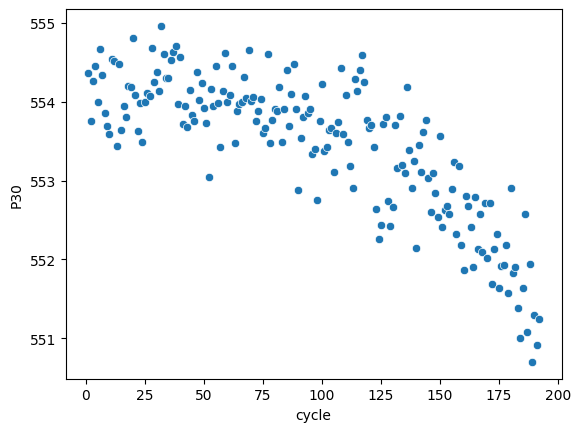

In [110]:
sns.scatterplot(data=one_engine, x='cycle', y='P30')

<Axes: xlabel='cycle', ylabel='P30'>

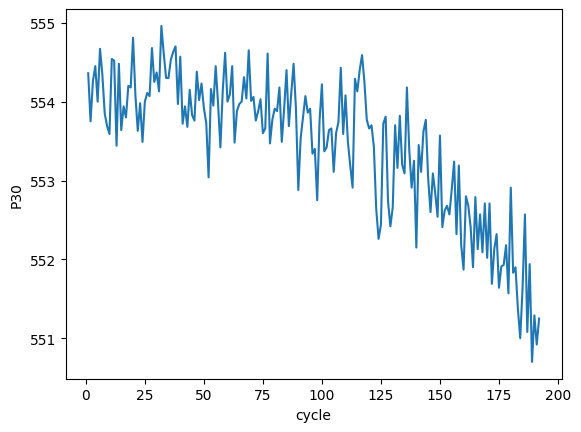

In [111]:
sns.lineplot(data=one_engine, x='cycle', y='P30')

In [112]:
# cycle을 그대로 label 사용하면 안됨 -> 이유
# sensor 값에 따라 고장까지 얼마를 남았는지에 대한 관계 보여주고 있음(변경되고 있음)

df.groupby('engine').agg({'cycle' : 'max'})

,cycle
engine,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


In [113]:
import numpy as np
cy_max = np.max(one_engine['cycle'])
cy_max = one_engine['cycle'] + 1
cy_max

0        2
1        3
2        4
3        5
4        6
      ... 
187    189
188    190
189    191
190    192
191    193
Name: cycle, Length: 192, dtype: int64

In [114]:
one_engine['RUL'] = cy_max - one_engine['cycle'] + 1
one_engine.tail()

,engine,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
187,1,188,-0.0067,0.0003,100,518.67,643.75,1602.38,1422.78,14.62,21.61,551.94,2388.31,9037.91,1.3,48.00,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100,38.51,22.9588,2
188,1,189,-0.0006,0.0002,100,518.67,644.18,1596.17,1428.01,14.62,21.61,550.70,2388.27,9044.55,1.3,48.08,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100,38.48,23.1127,2
189,1,190,-0.0027,0.0001,100,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100,38.49,23.0675,2
190,1,191,0.0000,-0.0004,100,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100,38.45,23.1295,2
191,1,192,0.0009,0.0000,100,518.67,643.54,1601.41,1427.20,14.62,21.61,551.25,2388.32,9033.22,1.3,48.25,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100,38.48,22.9649,2


In [116]:
rul_df = pd.DataFrame()

for i in range(100):
    one_engine = df.loc[df['engine'] == i + 1].copy()
    cy_max =np.max(one_engine['cycle'])
    one_engine['RUL'] = cy_max - one_engine['cycle'] + 1

    rul_df = pd.concat([rul_df, one_engine])


rul_df.head()

,engine,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,191
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,190
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,189
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,188


In [120]:
one_engine = rul_df.loc[rul_df['engine'] == 1]
one_engine

,engine,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,191
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,190
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,189
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100,518.67,643.75,1602.38,1422.78,14.62,21.61,551.94,2388.31,9037.91,1.3,48.00,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100,38.51,22.9588,5
188,1,189,-0.0006,0.0002,100,518.67,644.18,1596.17,1428.01,14.62,21.61,550.70,2388.27,9044.55,1.3,48.08,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100,38.48,23.1127,4
189,1,190,-0.0027,0.0001,100,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100,38.49,23.0675,3
190,1,191,0.0000,-0.0004,100,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100,38.45,23.1295,2


<Axes: xlabel='RUL', ylabel='P30'>

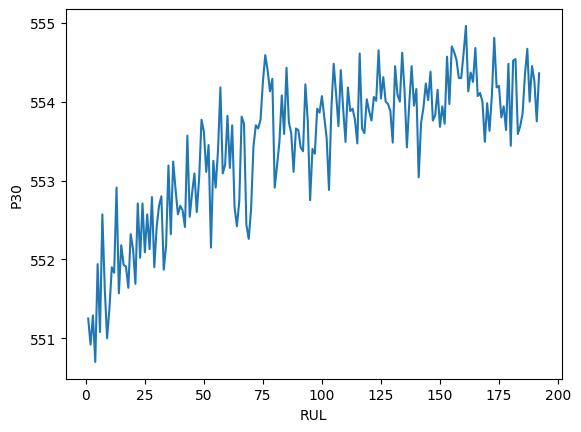

In [121]:
sns.lineplot(data=one_engine, x='RUL', y='P30')

In [122]:
one_engine = rul_df.loc[rul_df['engine'] == 2]
one_engine

,engine,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
192,2,1,-0.0018,0.0006,100,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100,38.94,23.4585,287
193,2,2,0.0043,-0.0003,100,518.67,641.82,1587.05,1393.13,14.62,21.61,554.77,2387.98,9051.31,1.3,47.24,522.70,2387.98,8131.09,8.4167,0.03,392,2388,100,39.06,23.4085,286
194,2,3,0.0018,0.0003,100,518.67,641.55,1588.32,1398.96,14.62,21.60,555.14,2388.04,9054.24,1.3,47.22,522.58,2387.99,8140.58,8.3802,0.03,391,2388,100,39.11,23.4250,285
195,2,4,0.0035,-0.0004,100,518.67,641.68,1584.15,1396.08,14.62,21.61,554.25,2387.98,9058.01,1.3,47.10,522.49,2387.93,8140.44,8.4018,0.03,391,2388,100,39.13,23.5027,284
196,2,5,0.0005,0.0004,100,518.67,641.73,1579.03,1402.52,14.62,21.60,555.12,2388.03,9058.15,1.3,47.25,522.27,2387.94,8136.67,8.3867,0.03,390,2388,100,39.18,23.4234,283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2,283,0.0046,0.0002,100,518.67,643.78,1602.03,1429.67,14.62,21.61,551.46,2388.16,9084.13,1.3,48.21,520.07,2388.20,8174.85,8.5199,0.03,398,2388,100,38.42,23.0358,5
475,2,284,-0.0006,0.0001,100,518.67,643.91,1601.35,1430.04,14.62,21.61,551.96,2388.22,9089.87,1.3,48.18,519.95,2388.21,8166.83,8.5291,0.03,395,2388,100,38.23,23.1196,4
476,2,285,-0.0007,0.0004,100,518.67,643.67,1596.84,1431.17,14.62,21.61,550.85,2388.20,9098.67,1.3,48.27,519.91,2388.22,8164.83,8.5242,0.03,396,2388,100,38.39,23.1155,3
477,2,286,-0.0010,-0.0003,100,518.67,643.44,1603.63,1429.57,14.62,21.61,551.61,2388.18,9102.01,1.3,48.14,519.51,2388.22,8169.97,8.4932,0.03,395,2388,100,38.33,23.0169,2


<Axes: xlabel='RUL', ylabel='P30'>

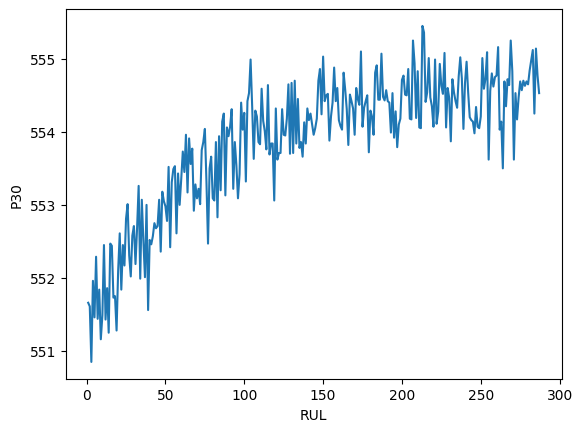

In [123]:
sns.lineplot(data=one_engine, x='RUL', y='P30')

In [124]:
one_engine = rul_df.loc[rul_df['engine'] == 3]
one_engine

,engine,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
479,3,1,0.0008,0.0005,100,518.67,642.04,1584.20,1398.13,14.62,21.61,553.96,2388.06,9056.95,1.3,47.14,522.24,2388.00,8138.40,8.4207,0.03,391,2388,100,38.96,23.3205,179
480,3,2,-0.0010,0.0000,100,518.67,642.66,1587.04,1398.62,14.62,21.61,554.76,2388.05,9059.67,1.3,47.35,522.03,2388.01,8137.38,8.3949,0.03,390,2388,100,39.07,23.4369,178
481,3,3,0.0013,-0.0002,100,518.67,642.07,1580.75,1401.10,14.62,21.61,554.51,2388.03,9050.43,1.3,46.94,522.16,2388.01,8137.20,8.3820,0.03,393,2388,100,39.03,23.3162,177
482,3,4,0.0008,-0.0002,100,518.67,642.50,1580.12,1395.76,14.62,21.61,554.48,2388.07,9060.43,1.3,47.44,522.31,2388.07,8139.35,8.3940,0.03,391,2388,100,38.94,23.4901,176
483,3,5,0.0020,0.0004,100,518.67,641.97,1581.48,1394.05,14.62,21.61,554.14,2388.01,9054.36,1.3,47.16,522.00,2388.03,8135.99,8.4233,0.03,391,2388,100,38.90,23.4190,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,3,175,-0.0030,0.0004,100,518.67,643.15,1603.74,1424.17,14.62,21.61,551.47,2388.06,9172.76,1.3,48.12,520.34,2388.14,8238.86,8.5066,0.03,396,2388,100,38.49,22.9909,5
654,3,176,-0.0008,0.0002,100,518.67,643.93,1595.61,1438.51,14.62,21.61,551.93,2388.18,9185.88,1.3,47.98,520.91,2388.12,8251.82,8.5245,0.03,396,2388,100,38.49,23.0656,4
655,3,177,-0.0041,-0.0002,100,518.67,643.68,1601.21,1423.50,14.62,21.61,552.17,2388.13,9191.53,1.3,48.10,520.19,2388.16,8249.86,8.5286,0.03,397,2388,100,38.37,23.0336,3
656,3,178,-0.0010,0.0001,100,518.67,643.66,1606.50,1430.55,14.62,21.61,551.31,2388.19,9193.98,1.3,48.38,520.14,2388.12,8253.84,8.5351,0.03,399,2388,100,38.57,23.1323,2


<Axes: xlabel='RUL', ylabel='P30'>

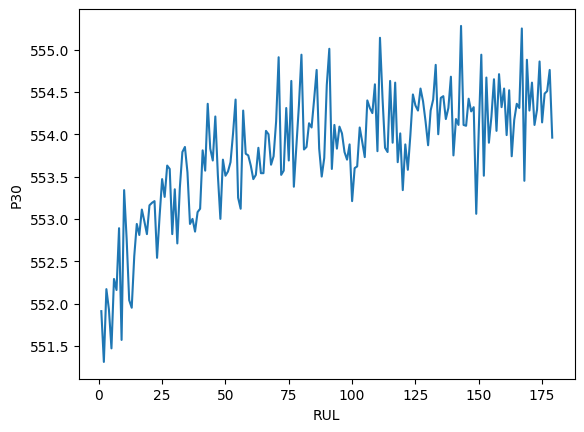

In [125]:
sns.lineplot(data=one_engine, x='RUL', y='P30')

<Axes: xlabel='RUL', ylabel='P30'>

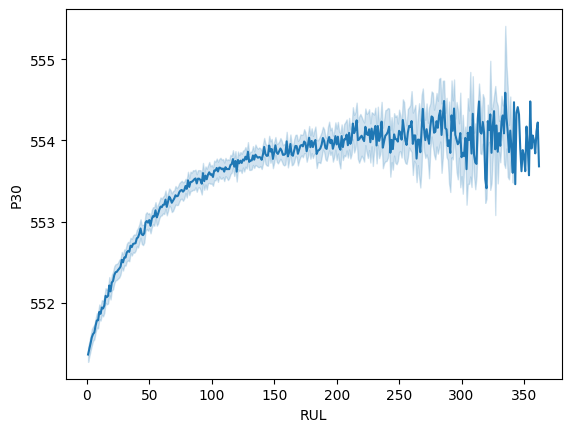

In [126]:
sns.lineplot(data=rul_df, x='RUL', y='P30')

In [127]:
rul_df.to_csv('exam2_modify1.csv', index=False)

In [128]:
rul_df = pd.read_csv('exam2_modify1.csv')
rul_df.head()

,engine,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,191
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,190
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,189
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,188


In [129]:
rul_df.columns

Index(['engine', 'cycle', 'op_1', 'op_2', 'op_3', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32', 'RUL'],
      dtype='object')

In [130]:
# Feature Selection - embeded

from sklearn.ensemble import RandomForestRegressor as RF

features = ['T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']

label = 'RUL'


model = RF()
model.fit(rul_df[features], rul_df[label])

RandomForestRegressor()

In [131]:
importance = pd.DataFrame()
importance['feature'] = features
importance['imp'] = model.feature_importances_
importance.sort_values(by='imp', ascending=False)

,feature,imp
10,Ps30,0.432353
8,Nc,0.128207
3,T50,0.097257
11,phi,0.048630
13,NRc,0.040087
6,P30,0.039593
14,BPR,0.036450
20,W32,0.034535
2,T30,0.031073
1,T24,0.030077


<Axes: xlabel='RUL', ylabel='Ps30'>

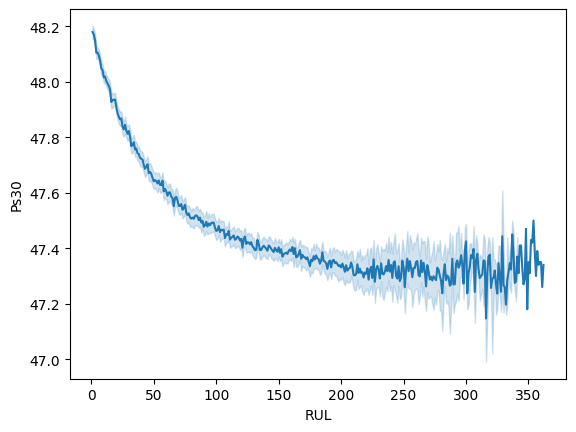

In [132]:
sns.lineplot(data=rul_df, x='RUL', y='Ps30')

# 정비 회수가 많이 남아 있는 엔진의 고장율 낮음

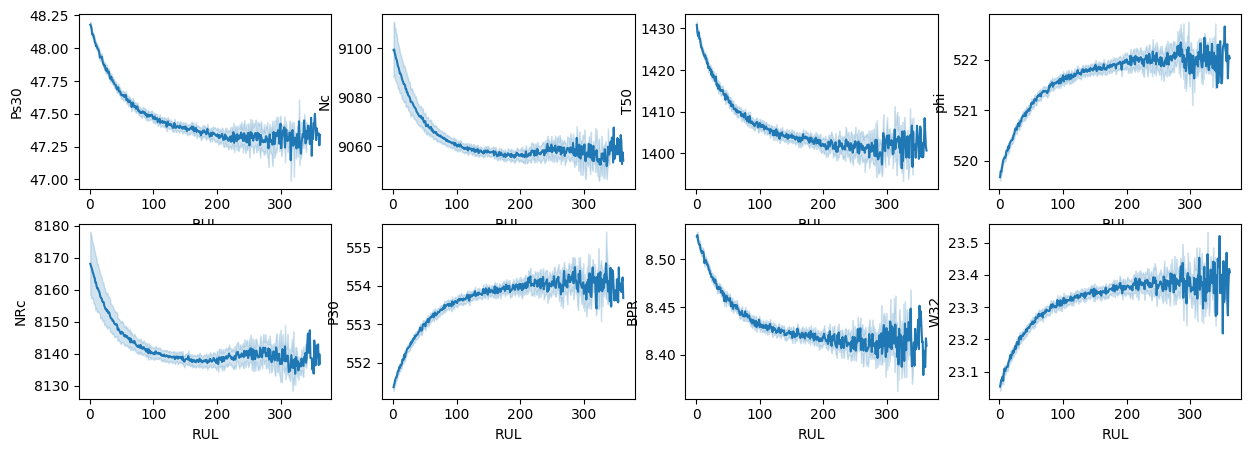

In [134]:
# importance Feature 상위 8개에 대한 column 과 RUL와의 관계

fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4) 
fig.set_size_inches(15, 5)

sns.lineplot(data=rul_df, x='RUL', y='Ps30', ax=ax1)
sns.lineplot(data=rul_df, x='RUL', y='Nc', ax=ax2)
sns.lineplot(data=rul_df, x='RUL', y='T50', ax=ax3)
sns.lineplot(data=rul_df, x='RUL', y='phi', ax=ax4)

sns.lineplot(data=rul_df, x='RUL', y='NRc', ax=ax5)
sns.lineplot(data=rul_df, x='RUL', y='P30', ax=ax6)
sns.lineplot(data=rul_df, x='RUL', y='BPR', ax=ax7)
sns.lineplot(data=rul_df, x='RUL', y='W32', ax=ax8)
plt.show()

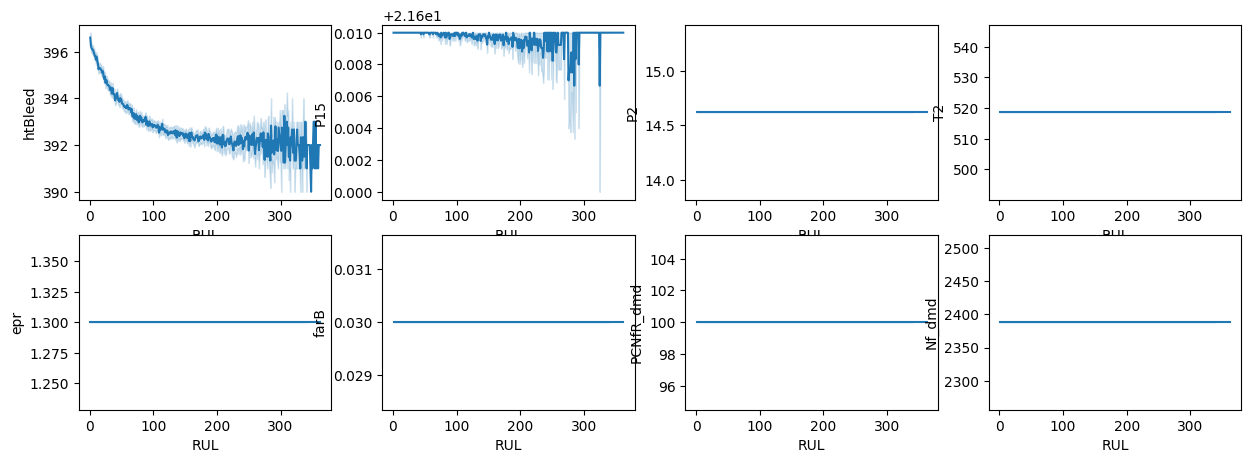

In [136]:
# importance Feature 하위 8개에 대한 column 과 RUL와의 관계

fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4) 
fig.set_size_inches(15, 5)

sns.lineplot(data=rul_df, x='RUL', y='htBleed', ax=ax1)
sns.lineplot(data=rul_df, x='RUL', y='P15', ax=ax2)
sns.lineplot(data=rul_df, x='RUL', y='P2', ax=ax3)
sns.lineplot(data=rul_df, x='RUL', y='T2', ax=ax4)

sns.lineplot(data=rul_df, x='RUL', y='epr', ax=ax5)
sns.lineplot(data=rul_df, x='RUL', y='farB', ax=ax6)
sns.lineplot(data=rul_df, x='RUL', y='PCNfR_dmd', ax=ax7)
sns.lineplot(data=rul_df, x='RUL', y='Nf_dmd', ax=ax8)
plt.show()

In [137]:
# Filter 방식의 변수 선택하는 방법

desc = rul_df.describe()
desc

,engine,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,108.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,0.267087,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,1.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,52.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,104.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,156.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,362.000000


In [138]:
desc = rul_df.describe().T
desc.loc[desc['std'] < 0.01]

,count,mean,std,min,25%,50%,75%,max
op_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.00,0.0015,0.0087
op_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.00,0.0003,0.0006
op_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.00,100.0000,100.0000
T2,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.67,518.6700,518.6700
P2,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.62,14.6200,14.6200
P15,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.61,21.6100,21.6100
epr,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.30,1.3000,1.3000
farB,20631.0,0.030000,1.387812e-17,0.0300,0.0300,0.03,0.0300,0.0300
Nf_dmd,20631.0,2388.000000,0.000000e+00,2388.0000,2388.0000,2388.00,2388.0000,2388.0000
PCNfR_dmd,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.00,100.0000,100.0000


In [140]:
desc.loc[desc['std'] >= 0.01].T.columns

Index(['engine', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL'],
      dtype='object')

In [141]:
interested = ['engine', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL']

rul_df[interested].to_csv('exam2.modify2.csv', index=False)

In [143]:
rul_df = pd.read_csv('exam2.modify2.csv')

In [144]:
rul_df

,engine,cycle,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,191
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,190
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,189
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,5
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,4
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,3
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,2


In [146]:
features = ['engine', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']
label = 'RUL'

train, test = rul_df[0::2], rul_df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

# 모델 기획 및 수립

- XGBoost, CatBoost, LightGBM -> Tree 기반 알고리즘
- GBDT(Gradient Boosted Decision Tree) - Boosting 계역 알고리즘
---
- 추가 공부 순서
  - Decision Tree > RandomForest(bagging) -> GBDT Boosting)

XGBoost, CatBoost, 그리고 LightGBM은 모두 Gradient Boosting을 기반으로 한 고성능 머신러닝 알고리즘입니다. 이들은 일반적으로 구조화된 데이터(테이블 형식의 데이터)에서 높은 성능을 발휘하며, 속도와 효율성을 크게 향상시키기 위해 각각의 알고리즘이 다양한 최적화 기법을 적용하고 있습니다.

XGBoost(2014년), LightGBM(2016년) - Microsoft , CatBoost(2017년)에 Inital release

1. XGBoost (eXtreme Gradient Boosting)

XGBoost는 Gradient Boosting 알고리즘의 확장 버전으로, 성능과 속도 향상을 위해 다양한 최적화 기법을 도입한 알고리즘입니다. XGBoost는 분류와 회귀 문제를 모두 해결할 수 있으며, 결측값 처리, 정규화, 병렬 처리를 포함한 여러 기능을 통해 모델의 성능을 극대화합니다.

- 특징
    - Regularization: L1 및 L2 정규화가 가능해 과적합을 방지할 수 있습니다.
    - Missing Value Handling: 결측값이 있는 데이터도 자동으로 처리합니다.
    - 병렬 처리: 여러 코어를 사용해 병렬로 트리를 생성하여 속도를 높입니다.
    - Pruning: 트리 깊이를 줄이는 Pruning을 통해 불필요한 노드를 제거합니다.


2. LightGBM (Light Gradient Boosting Machine)

LightGBM은 Microsoft에서 개발한 Gradient Boosting 프레임워크로, 특히 대규모 데이터와 높은 성능이 필요한 상황에서 뛰어난 속도와 효율성을 제공합니다. LightGBM은 Histogram-based 방식을 사용해 데이터의 분포를 효율적으로 분할하여 메모리 사용을 줄이고, 학습 속도를 빠르게 합니다

- 특징
    - Leaf-wise 성장: 트리의 깊이를 기준으로 하지 않고, 리프 노드를 기준으로 트리를 확장하여 더 빠르고 깊은 트리를 생성합니다.
    - Histogram-based 방식: 연속형 데이터를 히스토그램으로 변환하여 메모리 사용량을 줄이고 계산 속도를 높입니다.
    - Distributed Training: 대규모 데이터에서 분산 학습이 가능해 빅데이터 분석에 유리합니다.

3. CatBoost

CatBoost는 Yandex에서 개발한 Gradient Boosting 알고리즘으로, 특히 범주형 데이터 처리에 강점을 가지고 있습니다. CatBoost는 범주형 변수를 원-핫 인코딩 없이 직접 처리하여 메모리 사용을 최적화하고, 오버피팅을 방지하기 위해 다양한 기술을 적용합니다.

- 특징
    - 범주형 데이터의 자동 처리: 원-핫 인코딩 없이 범주형 데이터를 자동으로 인코딩하여 효율성을 높입니다.
    - Order Boosting: 트리 구성 시 데이터 순서를 섞어 모델이 과적합하지 않도록 합니다.
    - GPU 학습 지원: GPU를 활용한 학습을 통해 매우 빠른 학습 속도를 제공합니다.